# 2. Base de données d’animaux
### Labo n°3 : Kevin Ferati & Elliot Ganty

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

#### 1) Créez un notebook pour lire la base de données et générez un dataframe.

In [3]:
data = pd.read_csv('animals.txt', sep="\t")
data

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
0,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,3.0,492714.47,-999.0,-999.00,-999.00,...,-999.00,-999.00,-999,-999.00,-999.0,-999.00,-999.00,-999.00,-999.00,-999.00
1,Carnivora,Canidae,Canis,adustus,Canis adustus,1.0,10392.49,-999.0,745.32,-999.00,...,-17.53,13.00,0,35.20,1.0,0.14,90.75,236.51,922.90,1534.40
2,Carnivora,Canidae,Canis,aureus,Canis aureus,2.0,9658.70,-999.0,827.53,7.50,...,-17.05,45.74,0,79.29,0.0,0.10,44.61,217.23,438.02,1358.98
3,Carnivora,Canidae,Canis,latrans,Canis latrans,2.0,11989.10,-999.0,872.39,11.94,...,-168.12,-117.60,0,27.27,0.0,0.06,53.03,58.18,503.02,728.37
4,Carnivora,Canidae,Canis,lupus,Canis lupus,2.0,31756.51,-999.0,1055.00,14.01,...,-171.84,3.90,0,37.87,0.0,0.04,34.79,4.82,313.33,561.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,Rodentia,Muridae,Zyzomys,argurus,Zyzomys argurus,-999.0,40.42,-999.0,107.83,-999.00,...,114.33,131.09,0,1.10,0.0,0.02,62.33,256.75,692.93,1704.98
5412,Rodentia,Muridae,Zyzomys,maini,Zyzomys maini,-999.0,93.99,-999.0,-999.00,-999.00,...,131.45,132.66,0,0.17,0.0,0.00,90.76,265.30,877.90,1755.73
5413,Rodentia,Muridae,Zyzomys,palatilis,Zyzomys palatilis,-999.0,123.00,-999.0,-999.00,-999.00,...,136.72,137.08,0,0.00,0.0,-999.00,49.00,247.16,637.90,1638.67
5414,Rodentia,Muridae,Zyzomys,pedunculatus,Zyzomys pedunculatus,-999.0,100.00,-999.0,126.79,-999.00,...,130.16,132.97,0,0.09,0.0,0.25,21.64,215.72,291.82,1405.85


#### 2) Prenez la masse corporelle (en grammes) des animaux à leur âge adulte (colonne « 5-1_AdultBodyMass_g »).

In [4]:
AdultBodyMass_g = data['5-1_AdultBodyMass_g']
print(AdultBodyMass_g.shape)
print(AdultBodyMass_g)

(5416,)
0       492714.47
1        10392.49
2         9658.70
3        11989.10
4        31756.51
          ...    
5411        40.42
5412        93.99
5413       123.00
5414       100.00
5415        95.02
Name: 5-1_AdultBodyMass_g, Length: 5416, dtype: float64


#### 3) Observez la distribution des valeurs, 
calculez la valeur minimale, 
la valeur maximale, 
la moyenne et la médiane.
Vérifiez s’il y a des valeurs manquantes, des valeurs aberrantes, etc.

In [5]:
def g_to_kg(gVal):
    return gVal / 1000

minVal = AdultBodyMass_g.min()
print("Masse corporelle minimale: %s (%s kg) " % (minVal, g_to_kg(minVal)))

maxVal = AdultBodyMass_g.max()
print("Masse corporelle maximale: %s (%s kg) " % (maxVal, g_to_kg(maxVal)))

meanVal = AdultBodyMass_g.mean()
print("Masse corporelle moyenne: %s (%s kg) " % (meanVal, g_to_kg(meanVal)))

medianVal = AdultBodyMass_g.median()
print("Médiane masse corporelle: %s (%s kg) " % (medianVal, g_to_kg(medianVal)))

# => 1 valeur bool / element dans la série qui indique s'il est nul (si rien n'est nul on a que des zéros => la somme vaut zéro)
nullCounts = AdultBodyMass_g.isnull().sum()
print('%s valeurs manquantes' % (nullCounts))

# on part du principe que les valeurs négatives sont des valeurs aberrantes,
# la valeur maximale étant d'environ 154 tonnes, il n'y a pas besoin de fixer une limite haute, cette valeur est sensée
# (la baleine bleue par exemple peut peser jusqu'à 170 tonnes !)

filtered_data = data[data['5-1_AdultBodyMass_g'] > 0]
print('%s valeurs sont aberrantes (< 0)' % (len(data) - len(filtered_data)))

Masse corporelle minimale: -999.0 (-0.999 kg) 
Masse corporelle maximale: 154321304.5 (154321.3045 kg) 
Masse corporelle moyenne: 115940.09211964569 (115.9400921196457 kg) 
Médiane masse corporelle: 23.125 (0.023125 kg) 
0 valeurs manquantes
1874 valeurs sont aberrantes (< 0)


#### 4) Générez un histogramme des masses corporelles.
#### Q6. Que pouvez-vous conclure à partir de cet histogramme ?

9 masses de plus de 20 tonnes sur 3542 valeurs


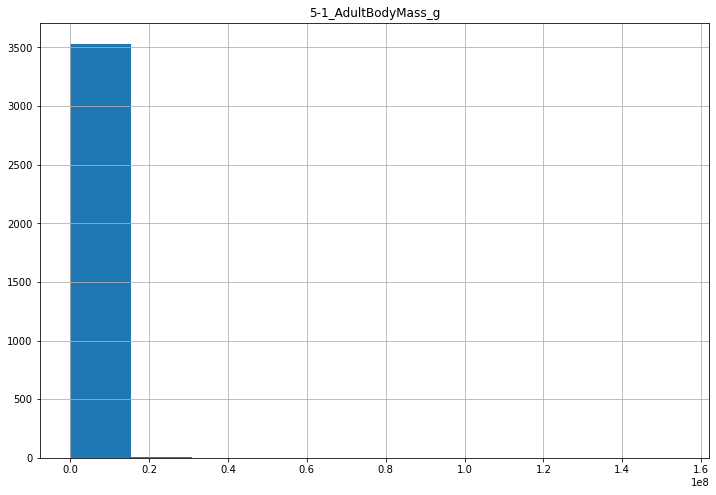

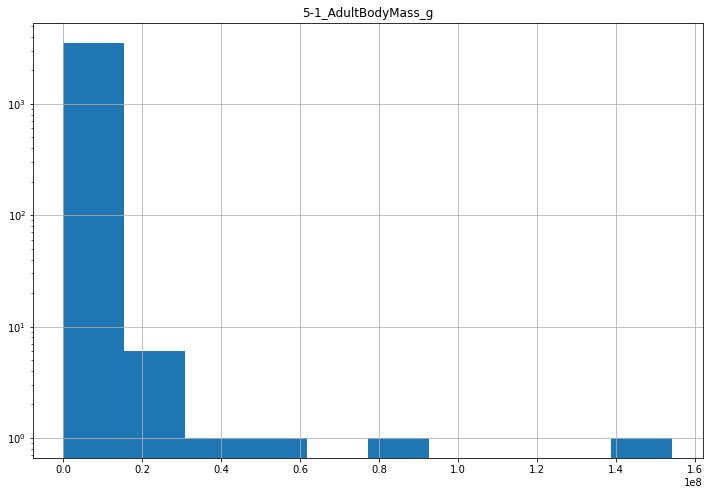

In [35]:
df = pd.DataFrame(filtered_data['5-1_AdultBodyMass_g'])
pd.DataFrame.hist(df, figsize=(12,8))

#un histogramme tel quel n'est donc pas très lisible, on réessaie avec une autre échelle
pd.DataFrame.hist(df, figsize=(12,8), log=True)

# On observe une distribution asymétrique, on a une asymétrie positive du au fait que la queue de distribution s'étend vers la
# droite, donc la majeur partie des animaux ont une masse corporelle variant entre 0 et 20 tonnes.
# on peut d'ailleurs calculer cette proportion :

higher_values = filtered_data[filtered_data['5-1_AdultBodyMass_g'] > 20000000]
print('%s masses de plus de 20 tonnes sur %s valeurs' % (len(higher_values), len(filtered_data)))

#### 5) Générez un histogramme des masses corporelles, mais pour les animaux qui n’atteignent pas les 50Kg à leur âge adulte.
#### Q7. Que pouvez-vous conclure à partir de cet histogramme ?

3287 masses de moins de 50 kg sur 3542 valeurs


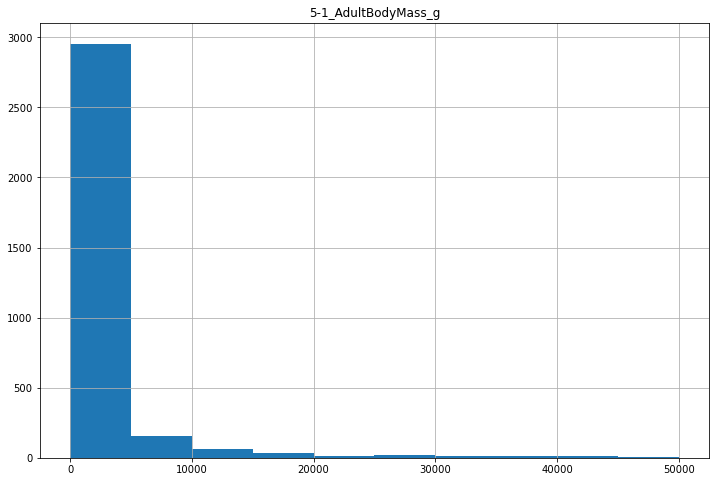

In [34]:
less_than_50 = filtered_data[filtered_data['5-1_AdultBodyMass_g'] < 50000]
df = pd.DataFrame(less_than_50['5-1_AdultBodyMass_g'])
pd.DataFrame.hist(df, figsize=(12,8))

# la majeur partie des animaux pèsent moins de 5-10 kilos
# on calcule cette proportion =>
print('%s masses de moins de 50 kg sur %s valeurs' % (len(less_than_50), len(filtered_data)))